#### This file will be used as the input for calculation of betweeness centrality data in Component 2 (file 'Cluster analysis')

In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from osmnx import simplification

In [2]:
import folium 
import branca
from folium import plugins
from folium.plugins import FastMarkerCluster
from collections import defaultdict

#### Get the street network data

In [3]:
# Put here the coordinates of the centre of the area of analysis
# For Sydney: 
c_point = (-33.882882592547034, 151.2063073174587)
# For Zurich:
#c_point = (47.372133, 8.516359)
# Here we put a bigger distance compared to the distance that we put in the file 
#'Building the spatial database --Step 2 -- Street network data acquisition from OSM'
# to have a more accurate calculation of node centrality measures
my_area_graph = ox.graph_from_point((c_point[0],c_point[1]),dist=2000)

In [4]:
G = my_area_graph

#### Visualise the graph if needed

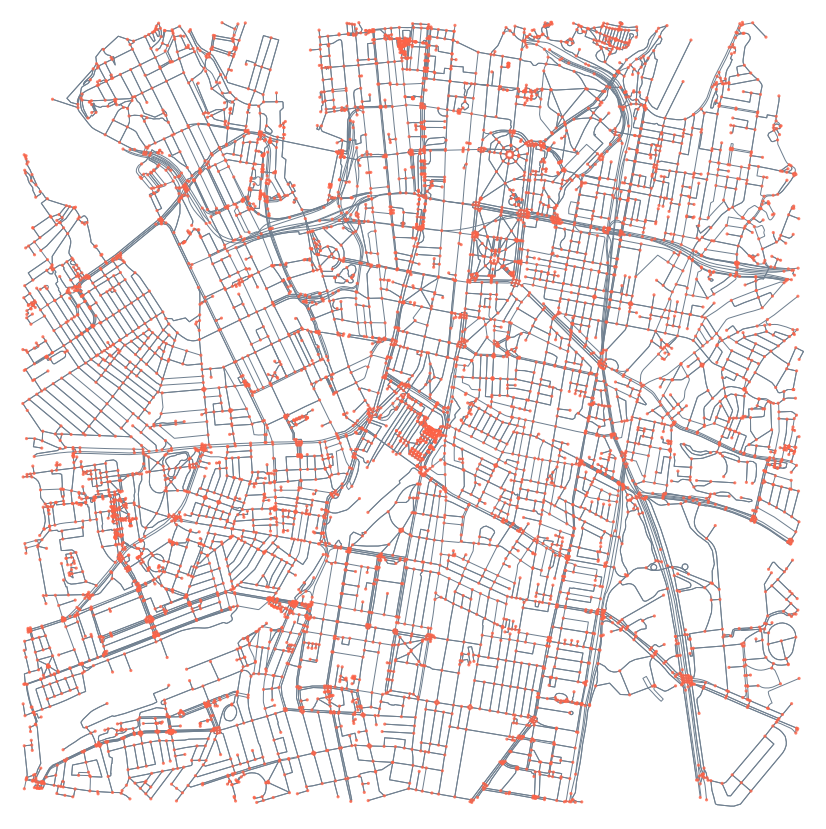

(<Figure size 1080x1080 with 1 Axes>, <AxesSubplot:>)

In [5]:
ox.plot_graph(my_area_graph, figsize=(15,15),node_color='tomato',
                           edge_color='slategrey',bgcolor='white',
             node_size=10, node_alpha=0.8)

#### Generate a simplified graph after merging some nodes which are too close and rebuilding the graph accordingly


In [6]:
G1 = simplification.consolidate_intersections(G, tolerance=0.00015,  rebuild_graph=True, dead_ends=False)


c:\users\demdr\python37\lib\site-packages\osmnx\simplification.py:443: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffered_nodes = gdf_nodes.buffer(tolerance).unary_union
c:\users\demdr\python37\lib\site-packages\osmnx\simplification.py:455: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = node_clusters.centroid


#### Visualise the simplified graph if needed


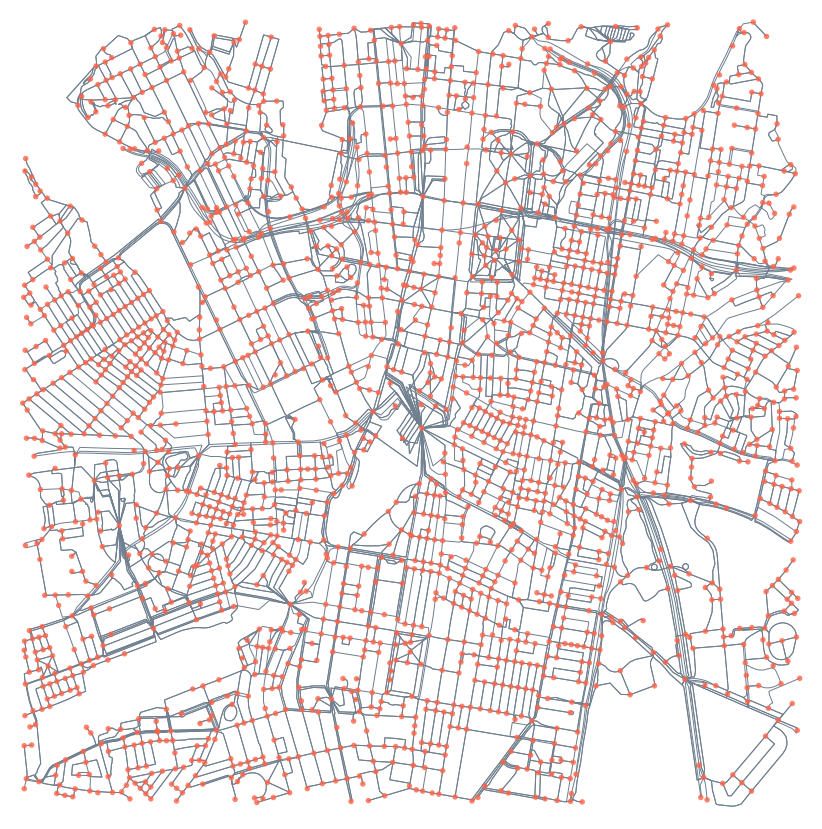

(<Figure size 1080x1080 with 1 Axes>, <AxesSubplot:>)

In [7]:
ox.plot_graph(G1, figsize=(15,15),node_color='tomato',
                           edge_color='slategrey',bgcolor='white',
             node_size=30, node_alpha=0.8)

#### Extract data from the simplified graph

In [8]:
my_area_dataframe1 = ox.utils_graph.graph_to_gdfs(G1)
node_csv1 = my_area_dataframe1[0].copy()

#### Calculate node centrality measures for the simplified graph
This will take some time if the analysed area is large 

In [9]:
G_stats1 = ox.stats.extended_stats(G1, connectivity=True, bc=True, cc=True)

#### Build a dataframe to store the extracted node centrality measures

In [10]:
stats_df = pd.DataFrame.from_dict(G_stats1)
stats_df['betweenness_centrality'].max(),stats_df['betweenness_centrality'].min()

(0.18176877518091614, 0.0)

In [11]:
stats_df['Latitude']=node_csv1['y']
stats_df['Longitude']=node_csv1['x']
stats_df['osmid'] = node_csv1['osmid']
stats_df

,avg_neighbor_degree,avg_neighbor_degree_avg,avg_weighted_neighbor_degree,avg_weighted_neighbor_degree_avg,degree_centrality,degree_centrality_avg,clustering_coefficient,clustering_coefficient_avg,clustering_coefficient_weighted,clustering_coefficient_weighted_avg,...,pagerank_min,node_connectivity,edge_connectivity,closeness_centrality,closeness_centrality_avg,betweenness_centrality,betweenness_centrality_avg,Latitude,Longitude,osmid
2,3.500000,3.872787,1660.906745,2175.720297,0.003738,0.002967,0.000000,0.121428,0.000000e+00,0.000526,...,0.000063,1,1,0.052632,0.044545,0.002201,0.010822,-33.900860,151.215163,"[7372145385, 7372145386, 1130242078, 737207318..."
3,4.000000,3.872787,5843.877894,2175.720297,0.000831,0.002967,0.000000,0.121428,0.000000e+00,0.000526,...,0.000063,1,1,0.052630,0.044545,0.000000,0.010822,-33.900883,151.215812,2955340991
4,7.000000,3.872787,6604.802169,2175.720297,0.000831,0.002967,0.000000,0.121428,0.000000e+00,0.000526,...,0.000063,1,1,0.052631,0.044545,0.000000,0.010822,-33.900766,151.196509,"[7846841608, 3483460646]"
5,2.000000,3.872787,0.038415,2175.720297,0.000831,0.002967,0.000000,0.121428,0.000000e+00,0.000526,...,0.000063,1,1,0.008411,0.044545,0.000000,0.010822,-33.900839,151.193249,14750580
6,3.000000,3.872787,2571.591742,2175.720297,0.001661,0.002967,0.000000,0.121428,0.000000e+00,0.000526,...,0.000063,1,1,0.052643,0.044545,0.000000,0.010822,-33.900861,151.202954,253119382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760-1,3.666667,3.872787,4151.144552,2175.720297,0.002492,0.002967,0.000000,0.121428,0.000000e+00,0.000526,...,0.000063,1,1,0.052655,0.044545,0.000000,0.010822,-33.890016,151.194221,2199763285
850-0,5.500000,3.872787,0.270746,2175.720297,0.001661,0.002967,0.000000,0.121428,0.000000e+00,0.000526,...,0.000063,1,1,0.052658,0.044545,0.014693,0.010822,-33.886562,151.193969,33683544
850-1,3.000000,3.872787,1909.969540,2175.720297,0.003322,0.002967,0.000000,0.121428,0.000000e+00,0.000526,...,0.000063,1,1,0.052659,0.044545,0.022626,0.010822,-33.886531,151.193791,"[6904648628, 2170430620, 2170430655]"
885-0,8.000000,3.872787,12367.522111,2175.720297,0.001661,0.002967,0.333333,0.121428,3.047638e-07,0.000526,...,0.000063,1,1,0.052662,0.044545,0.020744,0.010822,-33.886199,151.218818,2546390988


#### Save the file to the desired path 

In [12]:
# This file will be used as the input for calculation of betweeness centrality data
# in Component 2 (file 'Cluster analysis')

# This is the path used during testing the functions 
# Replace it accordingly 
# Preferably, save this file to a folder that has all the files related to the spatial database 
stats_df.to_csv(r'C:\Users\demdr\Desktop\Testing the thesis functions\Project data\Spatial database\Centrality measures.csv')

# Visualise the results of the betweenness centrality analysis

In [13]:
centrality_map = folium.Map(location = [c_point[0],c_point[1]], zoom_start = 20, tiles='CartoDB positron' ) 
centrality_map.save("Betweenness centrality.html" )

node_latitudes = node_csv1['y'].values.tolist()
node_longitudes = node_csv1['x'].values.tolist()

northwest_mark = (node_csv1['y'].max(),node_csv1['x'].min())
northeast_mark = (node_csv1['y'].max(), node_csv1['x'].max())
southwest_mark = (node_csv1['y'].min(), node_csv1['x'].min())
southeast_mark = (node_csv1['y'].min(), node_csv1['x'].max())

# create a colourmap for visualisation of the nodes
steps = 7
radius_list = np.arange(0.05, 2, (2-0.05)/steps)
colormap = branca.colormap.linear.YlOrRd_09.scale(0.0, 0.9).to_step(steps)
gradient_map=defaultdict(dict)
nums = []
for i in range(steps):
    print(1/steps*i)
    gradient_map[1/steps*i] = colormap.rgb_hex_str(1/steps*i)
    nums.append(1/steps*i)
gmap=gradient_map


# include this to visualise the 4 corners of the analysed area
'''
folium.CircleMarker([northwest_mark[0],northwest_mark[1]], color='red', fill=True, radius=10, opacity=1, 
                    fill_opacity=1,
               popup = 'northwest').add_to(centrality_map)
folium.CircleMarker([northeast_mark[0],northeast_mark[1]], color='red', fill=True, radius=10, opacity=1,
                    fill_opacity=1,
               popup = 'northwest').add_to(centrality_map)
folium.CircleMarker([southwest_mark[0],southwest_mark[1]], color='red', fill=True, radius=10, opacity=1,
                    fill_opacity=1,
               popup = 'northwest').add_to(centrality_map)
folium.CircleMarker([southeast_mark[0],southeast_mark[1]], color='red', fill=True, radius=10, opacity=1,
                    fill_opacity=1,
               popup = 'northwest').add_to(centrality_map)
'''

    
for i in node_csv1.index.values.tolist():
    this_pt = (node_csv1.loc[i, 'y'],node_csv1.loc[i, 'x'])
    this_col = 'betweenness_centrality'
    this_val = stats_df.loc[i, this_col]
    this_max = stats_df[this_col].max()*0.7
    this_colour = gmap[nums[1]]
    this_radius = 0.2
    this_radius_0 = 0.2
    if this_val> this_max/7:
        this_colour = gmap[nums[2]]
        this_radius = this_radius_0 * 1
    if this_val> 2*this_max/7:
        this_colour = gmap[nums[3]]
        this_radius = this_radius_0 * 2
    if this_val> 3*this_max/7:
        this_colour = gmap[nums[4]]
        this_radius = this_radius_0 * 3
    if this_val> 4*this_max/7:
        this_colour = gmap[nums[5]]
        this_radius = this_radius_0 * 4
    if this_val> 5*this_max/7:
        this_colour = gmap[nums[6]]
        this_radius = this_radius_0 * 5
    if this_val> 6*this_max/7:
        this_colour = gmap[nums[6]]
        this_radius = this_radius_0 * 6
    folium.CircleMarker([this_pt[0],this_pt[1]], color=this_colour, fill_color = this_colour, fill=True, 
                        radius=this_radius, opacity=0.8,
               popup = str(stats_df.loc[i, 'betweenness_centrality'])).add_to(centrality_map)
                       

    
centrality_map.save("Betweenness centrality.html" )
from IPython.display import IFrame

IFrame(src='./Betweenness centrality.html', width=1500, height=1500)

0.0
0.14285714285714285
0.2857142857142857
0.42857142857142855
0.5714285714285714
0.7142857142857142
0.8571428571428571
